# Merge/Join Tables (VLOOKUP)

The _merge_ function mimics the functionality of JOIN in SQL queries and replaces the VLOOKUP functionality in Excel. It is one of the most powerful and useful functions for dataframes in Pandas. The main idea is to:
- **join** two (or more) dataframe table using similar keys in each of the tables. 
- **enrich** tables with loopup data  
- **validate** the match values of the key columns in the tables

In [4]:
import pandas as pd

## Loading data

We will now start with another data from API from [Simple Maps](https://simplemaps.com/data/us-zips)

In [1]:
url = 'https://mlguy-public.s3-eu-west-1.amazonaws.com/excel2pandas/chapter3/simplemaps_uszips_basicv1/uszips.csv'

import requests
from io import StringIO

response = requests.get(url)
response

<Response [200]>

In [5]:
df = (
    pd
    .read_csv(StringIO(response.text))
)

df.head(5)

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18004,-66.75218,Adjuntas,PR,Puerto Rico,True,NaN,17242,111.4,72001,Adjuntas,"{'72001':99.43,'72141':0.57}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36073,-67.17517,Aguada,PR,Puerto Rico,True,NaN,38442,523.5,72003,Aguada,{'72003':100},Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45439,-67.12202,Aguadilla,PR,Puerto Rico,True,NaN,48814,667.9,72005,Aguadilla,{'72005':100},Aguadilla,72005,False,False,America/Puerto_Rico
3,606,18.16724,-66.93828,Maricao,PR,Puerto Rico,True,NaN,6437,60.4,72093,Maricao,"{'72093':94.88,'72121':1.35,'72153':3.78}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29032,-67.12243,Anasco,PR,Puerto Rico,True,NaN,27073,312.0,72011,AÃ±asco,"{'72003':0.55,'72011':99.45}",AÃ±asco|Aguada,72011|72003,False,False,America/Puerto_Rico


## Lookup Data Exploration

We have loaded the zip code Lookup data for the US. Let's see what data do we have here.

## Counting Values

The simplest aggregation function for each group is the _size_. How many breweries do we have in each state?

In [6]:
(
    df
    .groupby('state_id')
    .size()
)

state_id
AK     238
AL     642
AR     591
AZ     405
CA    1761
CO     525
CT     282
DC      52
DE      67
FL     981
GA     735
HI      94
IA     934
ID     277
IL    1383
IN     775
KS     697
KY     767
LA     515
MA     537
MD     468
ME     432
MI     986
MN     884
MO    1022
MS     423
MT     361
NC     808
ND     383
NE     581
NH     248
NJ     595
NM     368
NV     175
NY    1794
OH    1195
OK     648
OR     417
PA    1795
PR     131
RI      77
SC     424
SD     371
TN     628
TX    1935
UT     287
VA     896
VT     255
WA     596
WI     772
WV     706
WY     178
dtype: int64

## Sorting Values

To sort the values is also simple with _sort_value()_ function

In [8]:
us_population_distribution = (
    df
    .groupby('state_id')['population']
    .sum()
    .sort_values(ascending=False)
)

us_population_distribution

state_id
CA    39140219
TX    27884135
FL    20594164
NY    19618323
IL    12821487
PA    12790950
OH    11639989
GA    10297534
NC    10155624
MI     9957465
NJ     8881845
VA     8414042
WA     7280023
AZ     6949259
MA     6830133
TN     6644470
IN     6637220
MO     6090358
MD     6003435
WI     5777892
CO     5531233
MN     5527473
SC     4955925
AL     4864630
LA     4663243
KY     4446667
OR     4081732
OK     3918473
CT     3581504
PR     3384779
IA     3133061
UT     3043806
AR     2990472
MS     2988710
NV     2923171
KS     2908448
NM     2089570
NE     1904901
WV     1828786
ID     1687214
HI     1422019
NH     1343673
ME     1332721
RI     1056611
MT     1042359
DE      949495
SD      864012
ND      751250
AK      737979
DC      684390
VT      624977
WY      582091
Name: population, dtype: int64

## Visualization of the data


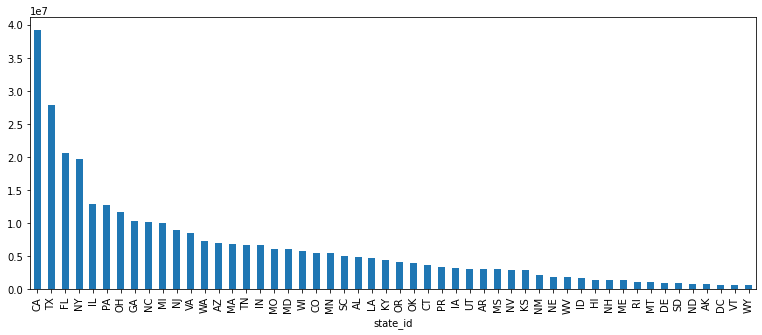

In [12]:
(
    us_population_distribution
    .plot
    .bar(figsize=(13,5))
);